## PCA

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df=pd.read_csv("dataset/data/sample_4M_cod.csv", dtype='int64')

In [3]:
# Definicion de funciones para graficar varianza de PCA 
#y funcion de clasificacion de componentes principales

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

def plot_variance(pca, width=8, dpi=100):
    # Crear figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", title="% Varianza explicada", ylim=(0.0, 1.0)
    )
    # Varianza acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", title="% Varianza Acumulada", ylim=(0.0, 1.0)
    )
    # tamaño figura
    fig.set(figwidth=8, dpi=100)
    return axs

In [4]:
#seleccion de caracteristicas del conjunto de datos 
features = ['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
            'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT',
            'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 
            'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 
            'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
            'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE',
            'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE']
X = df.copy()
y = X.pop('AttackCod')
X = X.loc[:, features]
# Estandarizacion
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [5]:
# Creacion de componentes principales llamando a la funcion de PCA
pca = PCA(n_components=0.91)
X_pca = pca.fit_transform(X_scaled)

# Convercion de PCA a Dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head(7)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,1.408236,0.049833,-0.332277,0.253339,-0.384367,0.248033,-0.172581,0.322390,0.029745,0.007321,...,0.050308,-0.442489,0.084646,-0.421616,0.167875,-0.194546,0.552046,-0.400023,-0.375143,0.673189
1,0.751092,0.022884,0.015247,-0.713580,0.632618,-0.324364,-0.634809,4.151486,0.982345,0.859724,...,-0.108729,0.769822,0.301268,-1.775267,-2.211009,-0.892301,1.041511,-0.198304,-0.901505,2.567550
2,3.806694,-0.427758,-0.391261,0.374494,-0.589341,0.169853,-0.430228,-0.428870,-0.071234,-0.199638,...,0.003906,0.057212,-0.400480,-0.235540,0.367040,-0.531889,0.202349,-0.204848,-0.425789,0.571748
3,-0.259329,2.206800,0.188955,0.068121,-0.013788,-0.062406,-0.017671,1.484064,0.672444,-0.396572,...,-0.058449,-0.209866,0.193637,0.811581,0.209397,0.029527,0.019381,0.156003,0.138527,-0.013914
4,-0.816929,1.985861,0.242785,-0.161349,0.212033,-0.082572,-0.030824,1.978815,0.809329,-0.482387,...,0.001405,-0.057202,0.163360,1.059945,0.042226,-0.418411,0.263780,-0.054102,-0.185787,0.029559
5,0.730472,-0.215871,-0.323021,0.026686,-0.151298,0.254857,-0.107213,0.638513,0.000887,0.098789,...,-0.140119,-0.107527,0.224940,-1.024907,-0.239427,0.020859,0.586724,-0.302957,-0.260553,0.550525
6,0.207834,3.923442,0.903940,0.454264,0.116367,-0.753278,-0.539926,2.475167,0.353164,1.341894,...,0.060211,1.232030,-0.794056,-3.640139,-5.089707,-1.757275,0.283228,-2.294900,-3.411160,-1.804821


In [6]:
X_pca.shape

(4000000, 22)

In [44]:
n_components = pca.n_components_
print(f"Number of components to explain 99% variance: {n_components}")

Number of components to explain 99% variance: 22


In [6]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
print(loadings)

                                  PC1       PC2       PC3       PC4       PC5  \
L4_SRC_PORT                  0.098679  0.197041 -0.010986  0.124789 -0.145889   
L4_DST_PORT                  0.047635  0.101151  0.040928 -0.076792  0.091349   
PROTOCOL                    -0.274652 -0.059670  0.015295  0.020421 -0.035999   
L7_PROTO                    -0.221199 -0.359346 -0.033978 -0.087727  0.059521   
IN_BYTES                     0.005829 -0.097008  0.325040  0.342905 -0.020842   
IN_PKTS                     -0.008125 -0.112004  0.218864  0.240540 -0.081158   
OUT_BYTES                    0.023899 -0.041058  0.349789 -0.242601 -0.340221   
OUT_PKTS                     0.026980 -0.043437  0.362759 -0.148486 -0.221413   
TCP_FLAGS                    0.305888 -0.112706 -0.087564  0.082948 -0.104634   
CLIENT_TCP_FLAGS             0.305160 -0.117652 -0.087623  0.082434 -0.103995   
SERVER_TCP_FLAGS             0.295379 -0.051559 -0.054327  0.039888 -0.044211   
FLOW_DURATION_MILLISECONDS  

array([<Axes: title={'center': '% Varianza explicada'}, xlabel='Componente'>,
       <Axes: title={'center': '% Varianza Acumulada'}, xlabel='Componente'>],
      dtype=object)

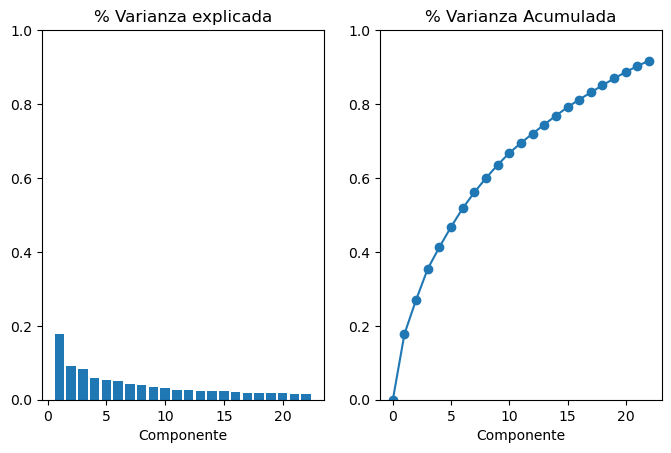

In [45]:
# Graficamos la varianza explicada y acumulada con la funcion definida
plot_variance(pca)

1. Seleccionar los Componentes Principales: Ya identificados los componentes principales que tienen un MI score > 0.5. se crea un nuevo DataFrame que contenga solo esos componentes. Por ejemplo, si PC1, PC3 y PC5 son los que cumplen esa condición, harías lo siguiente:

In [7]:
features=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']

X = X_pca[features]

2. Entrenar el Modelo: Ahora  selected_components sera el nuevo conjunto de características para entrenar un modelo. A continuación, un ejemplo genérico usando un modelo de regresión logística de sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(selected_components, y)  # 'y' es tu variable objetivo

## Entrenamiento DNN +PCA

### DNN + pCA

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
import numpy as np
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping

In [9]:
# `X` son las características y `y` las clases (tipos de ataques)
# Se dividen los datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Se divide el conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape,X_test.shape)

(2800000, 22) (600000, 22)


In [10]:
model = keras.Sequential([
        
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu', input_shape=(22,)),    
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1), 
    
    # Capa de salida para 2 clases, con función de activación sigmoid 
    layers.Dense(1, activation='sigmoid')
])
# Compilación del modelo. 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visualizar el modelo en forma de gráfico y guardarlo en un archivo
plot_model(model, to_file='modelDNN_PCA_2do.png', show_shapes=True, show_layer_names=True)

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Definir el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

start_time = time.time()
# Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30,batch_size=128, callbacks=[early_stopping])

# Calcular el tiempo transcurrido en minutos
end_time = time.time()
elapsed_time_minutes = (end_time - start_time) / 60
print("Tiempo de entrenamiento (minutos):", elapsed_time_minutes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
21875/21875 [==============================] - 60s 3ms/step - loss: 0.0138 - accuracy: 0.9963 - val_loss: 0.0072 - val_accuracy: 0.9978
Epoch 2/30
21875/21875 [=============

### Metricas

In [11]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Realiza predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convierte las probabilidades en clases predichas (usando un umbral de 0.5)

# Calcula la precisión, el recall y el F1-score para la clasificación binaria
precision = precision_score(y_test, y_pred_classes, average='binary')
recall = recall_score(y_test, y_pred_classes, average='binary')
f1 = f1_score(y_test, y_pred_classes, average='binary')
accuracy = accuracy_score(y_test, y_pred_classes)

print("Exactitud:", accuracy)
print("Sensibilidad:", recall)
print("Precision:", precision)
print("F1-score:", f1)

18750/18750 [==============================] - 18s 965us/step
Exactitud: 0.99914
Sensibilidad: 0.9988966666666667
Precision: 0.999383033076097
F1-score: 0.9991397906823993


### Guardar Modelo Keras

In [16]:
model.save('dnn_PCA_2do.keras')

In [17]:
import pickle
# Guardar el historial de entrenamiento en un archivo(diccionario)
with open('historydnn_PCA_2do.pkl', 'wb') as file:
    pickle.dump(history.history, file, protocol=pickle.HIGHEST_PROTOCOL)

##### cargar

In [1]:
from keras.models import load_model
# Cargar el modelo desde un archivo en formato nativo de Keras
model = load_model('dnn_PCA.keras')

In [27]:
import pickle
# Cargar el historial de entrenamiento desde un archivo
with open('historydnn_PCA.pkl', 'rb') as file:
   history = pickle.load(file)

### Mejores

In [14]:
# Evaluación del modelo 
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Exactitud conjunto de prueba: {accuracy*100:.2f}%")

18750/18750 [==============================] - 42s 2ms/step - loss: 0.0062 - accuracy: 0.9987
Exactitud conjunto de prueba: 99.87%


In [12]:
# Evaluar el modelo en los conjuntos de datos
train_metrics = model.evaluate(X_train, y_train, verbose=0)
val_metrics = model.evaluate(X_val, y_val, verbose=0)
test_metrics = model.evaluate(X_test, y_test, verbose=0)

# Imprimir las métricas
metric_names = ['loss', 'accuracy', 'recall', 'precision', 'f1']
print("Metricas Datos Entrenamiento:")
for name, val in zip(metric_names, train_metrics):
    print(f"{name}: {val}")

print("\nMetricas Datos Validación:")
for name, val in zip(metric_names, val_metrics):
    print(f"{name}: {val}")

print("\nMetricas datos de prueba:")
for name, val in zip(metric_names, test_metrics):
    print(f"{name}: {val}")

Metricas Datos Entrenamiento:
loss: 0.0024352215696126223
accuracy: 0.999171793460846

Metricas Datos Validación:
loss: 0.002947878558188677
accuracy: 0.999144971370697

Metricas datos de prueba:
loss: 0.0028190044686198235
accuracy: 0.9991400241851807


### Graficar Curvas Aprendizaje Modelo en memoria (no cargado)

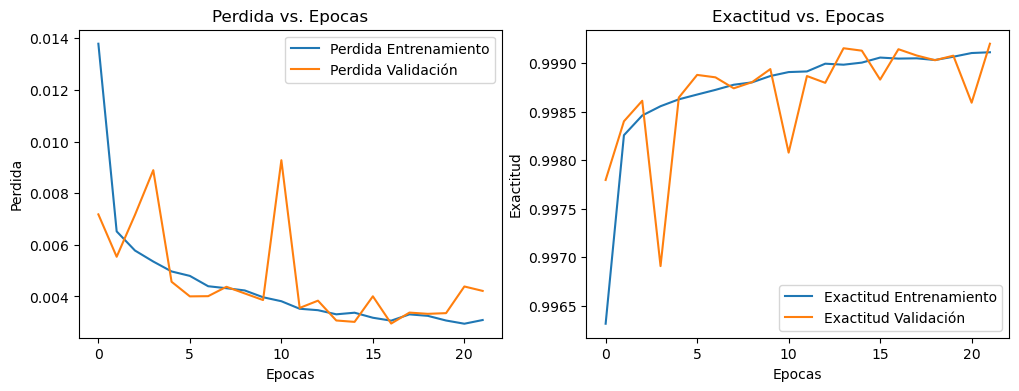

In [13]:
# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida Validación')
plt.title('Perdida vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitud Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud Validación')
plt.title('Exactitud vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.legend()

plt.show()

### Cargar diccionario de historia con pickle y graficar curvas de aprendizaje

In [ ]:
# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Perdida Entrenamiento')
plt.plot(history['val_loss'], label='Perdida Validación')
plt.title('Perdida vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Exactitud Entrenamiento')
plt.plot(history['val_accuracy'], label='Exactitud Validación')
plt.title('Exactitud vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.legend()

plt.show()

### AUC

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular el AUC
auc = roc_auc_score(y_test, y_pred)

El Area bajo la curva(AUC) es: 0.9999324376944445


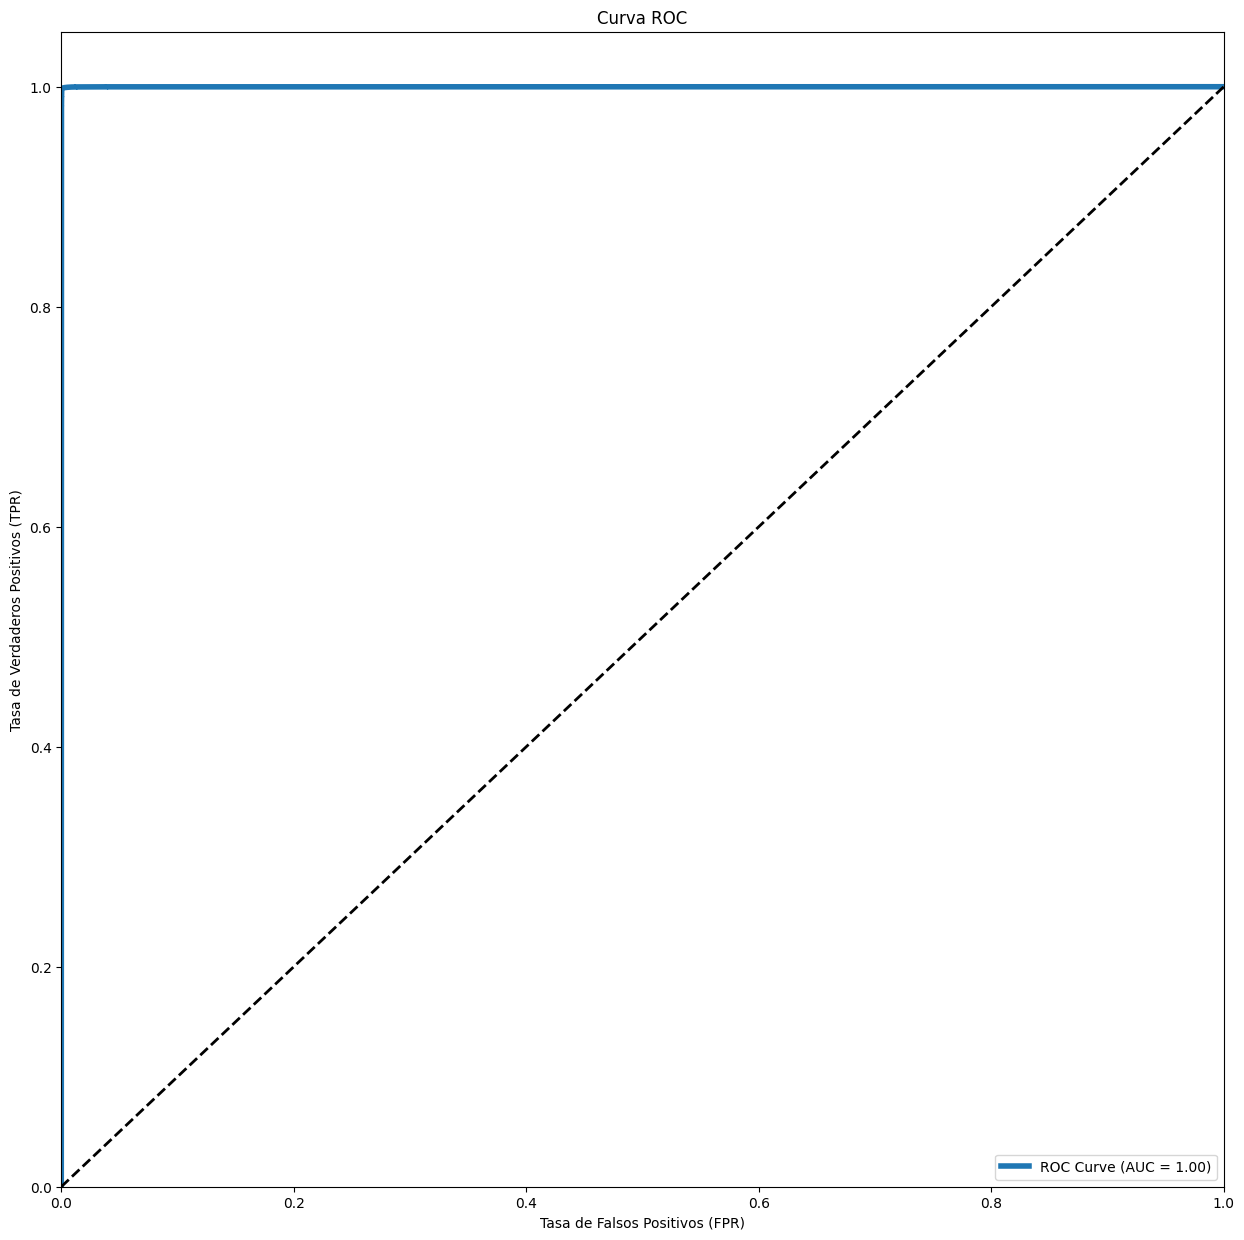

In [19]:
# Gráfica de la curva ROC
plt.figure(figsize=(15, 15))
plt.plot(fpr, tpr, linewidth=4, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")

#auc_crv = auc(fpr, tpr)
print(f"El Area bajo la curva(AUC) es: {auc}")

# Mostrar la gráfica de la curva ROC
plt.show()

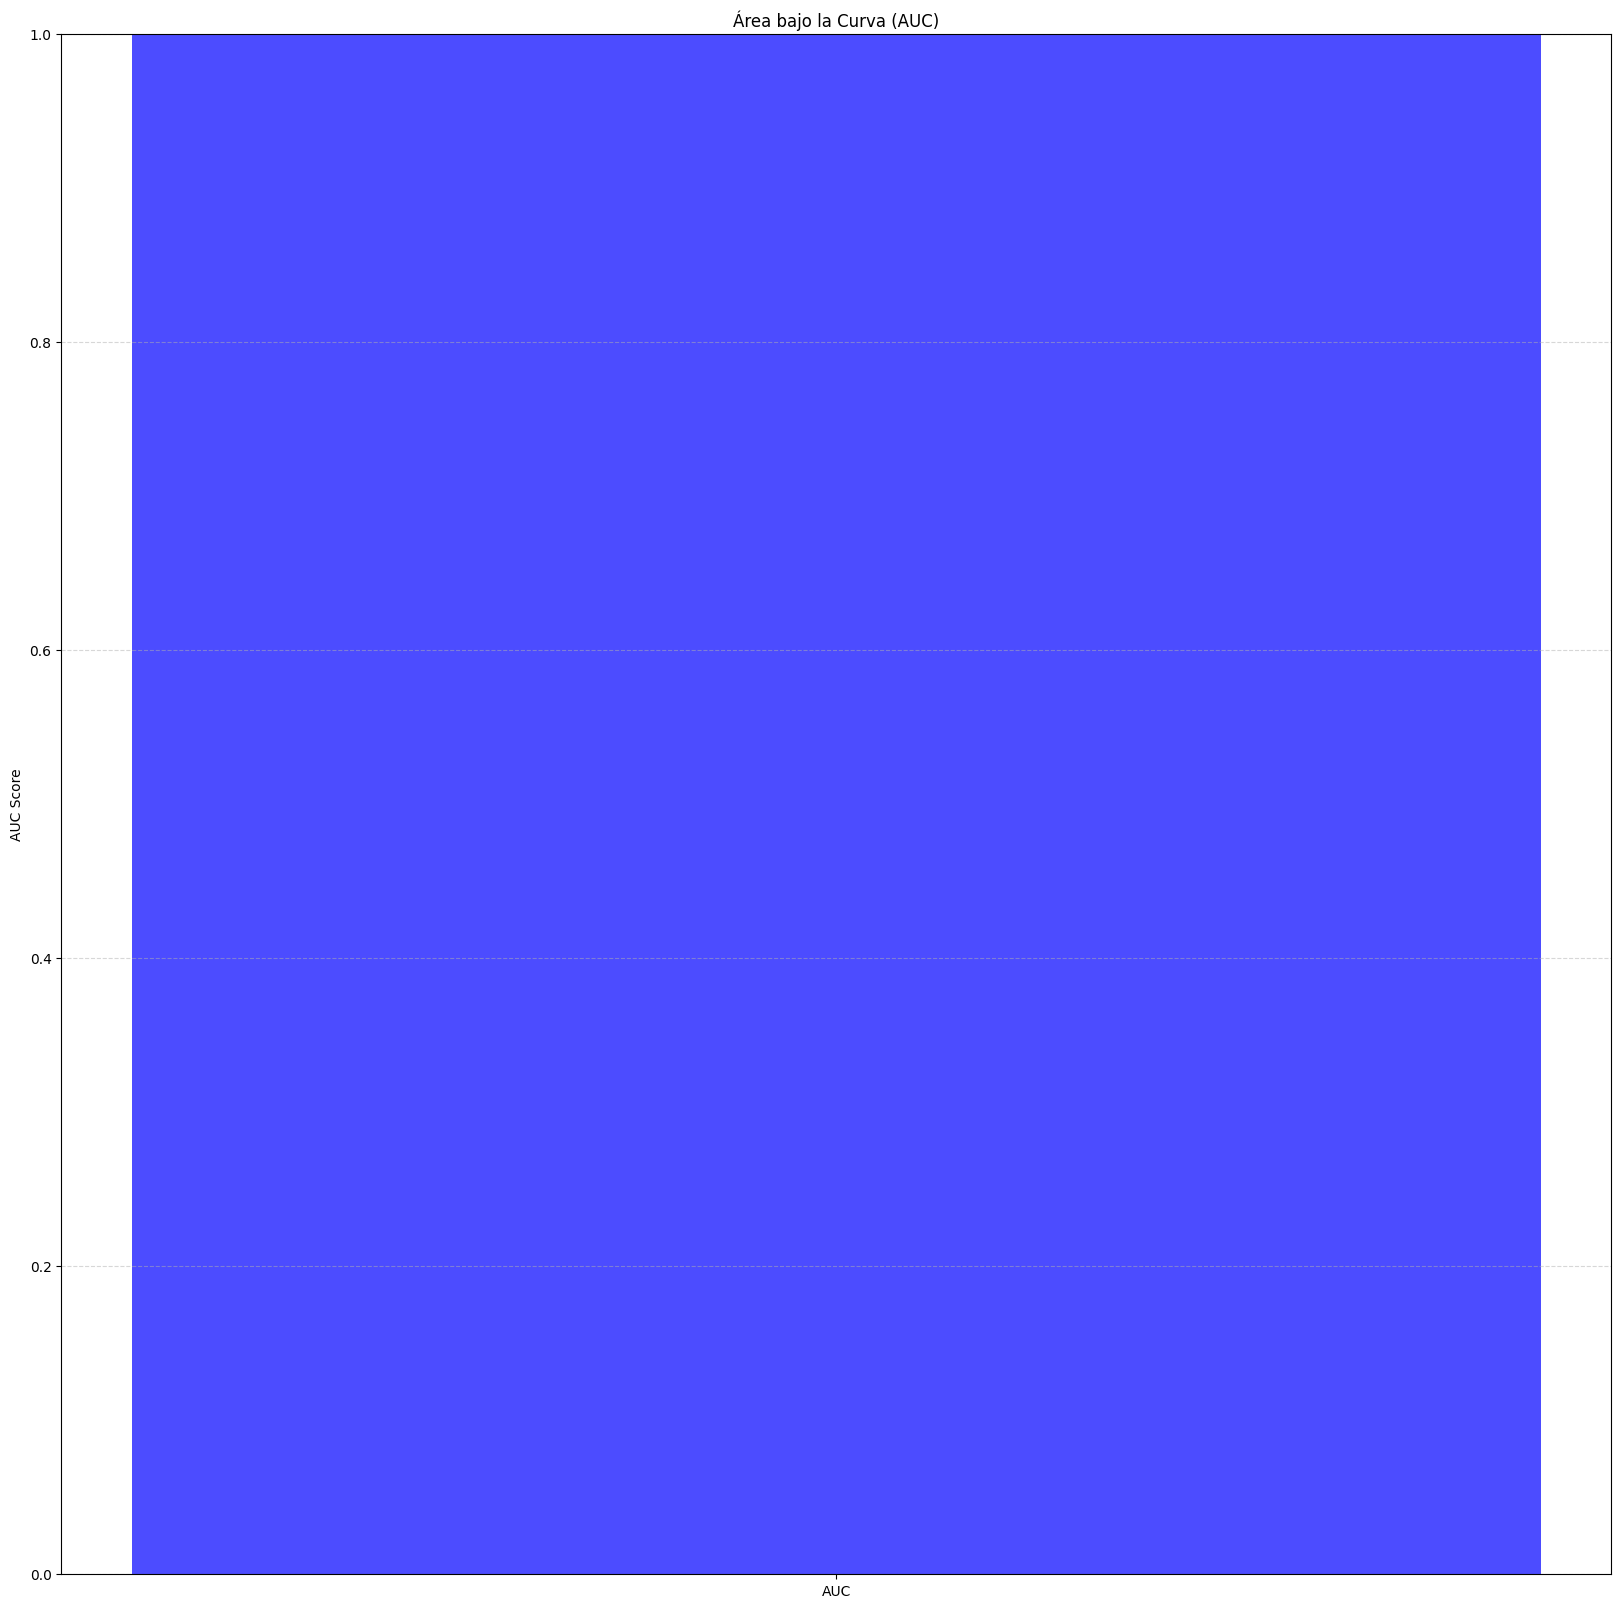

In [20]:
# Gráfica del AUC
plt.figure(figsize=(20, 20))
plt.bar(['AUC'], [auc], color='b', alpha=0.7)
plt.ylim([0.0, 1.0])
plt.ylabel('AUC Score')
plt.title('Área bajo la Curva (AUC)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar la gráfica del AUC
plt.show()

### MATRIZ

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Hacer predicciones
predicciones = model.predict(X_test)  # X_val es el conjunto de validación/prueba

# En un problema de clasificación binaria, normalmente se redondea la probabilidad a 0 o 1
# Esto es asumiendo que el modelo produce una salida de probabilidad para la clase positiva
predicciones_etiquetas = (predicciones > 0.5).astype(int)

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones_etiquetas)

# Imprimir la matriz de confusión
print(matriz_confusion)

18750/18750 [==============================] - 18s 969us/step
[[299815    185]
 [   331 299669]]


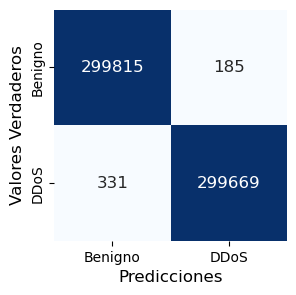

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'matriz_confusion' es tu matriz de confusión calculada previamente

# Definir los nombres de las clases
class_names = ["Benigno", "DDoS"]

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(3, 3))  # Ajustar el tamaño del gráfico
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})  # Ajustar el tamaño de la fuente

# Añadir etiquetas y título para mayor claridad
plt.xlabel('Predicciones', fontsize=12)  # Ajustar el tamaño de la fuente
plt.ylabel('Valores Verdaderos', fontsize=12)  # Ajustar el tamaño de la fuente
plt.show()


## CNN + PCA

### CNN 

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

In [19]:
# Asignar la columna de etiquetas a AttackCod
y = df['AttackCod'].values

In [21]:
# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [22]:
# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape,X_test.shape)

(2800000, 22) (600000, 22)


In [23]:
# Cambiar la forma de los datos para que sean compatibles con la CNN
# Asumiendo que X_train tiene una forma (n_samples, n_features)
# Lo cambiamos a (n_samples, n_features, 1) para que sea tratado como una imagen de 1D con múltiples canales
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [24]:
model = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualizar el modelo en forma de gráfico y guardarlo en un archivo
plot_model(model, to_file='modelCNN_PCA.png', show_shapes=True, show_layer_names=True)

# Resumen del modelo
model.summary()

# Definir el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Registrar el tiempo de inicio
start_time = time.time()

# Entrenar modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=192, callbacks=[early_stopping])
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=200)

# Calcular el tiempo transcurrido en minutos
end_time = time.time()
elapsed_time_minutes = (end_time - start_time) / 60
print("Tiempo de entrenamiento (minutos):", elapsed_time_minutes)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                20544     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                      

### Metricas


In [25]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Realiza predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convierte las probabilidades en clases predichas (usando un umbral de 0.5)

# Calcula la precisión, el recall y el F1-score para la clasificación binaria
precision = precision_score(y_test, y_pred_classes, average='binary')
recall = recall_score(y_test, y_pred_classes, average='binary')
f1 = f1_score(y_test, y_pred_classes, average='binary')
accuracy = accuracy_score(y_test, y_pred_classes)

print("Exactitud:", accuracy)
print("Sensibilidad:", recall)
print("Precision:", precision)
print("F1-score:", f1)


18750/18750 [==============================] - 22s 1ms/step
Exactitud: 0.9910783333333333
Sensibilidad: 0.9919635592429072
Precision: 0.9902036169724083
F1-score: 0.9910828067919261


### Guardar modelo keras

In [26]:
model.save('cnn_pca.keras')

In [27]:
import pickle
# Guardar el historial de entrenamiento en un archivo(diccionario)
with open('historycnn_pca.pkl', 'wb') as file:
    pickle.dump(history.history, file, protocol=pickle.HIGHEST_PROTOCOL)

##### Cargar

In [ ]:
from keras.models import load_model
# Cargar el modelo desde un archivo en formato nativo de Keras
model = load_model('cnn_pca.keras')

In [ ]:
import pickle
# Cargar el historial de entrenamiento desde un archivo
with open('historycnn_pca.pkl', 'rb') as file:
   history = pickle.load(file)

### Graficar Curvas Aprendizaje Modelo en memoria (no cargado)

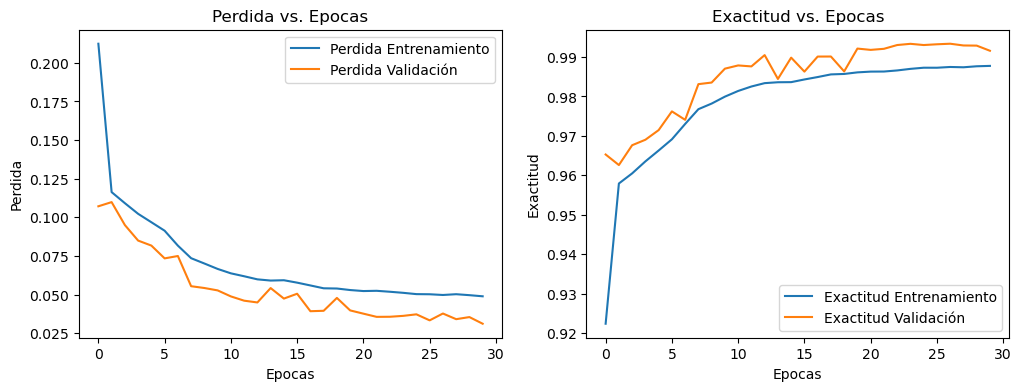

In [28]:
# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida Validación')
plt.title('Perdida vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitud Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud Validación')
plt.title('Exactitud vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.legend()

plt.show()


### Cargar diccionario de historia con pickle y graficar curvas de aprendizaje


In [ ]:

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Perdida Entrenamiento')
plt.plot(history['val_loss'], label='Perdida Validación')
plt.title('Perdida vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Exactitud Entrenamiento')
plt.plot(history['val_accuracy'], label='Exactitud Validación')
plt.title('Exactitud vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.legend()

plt.show()

### AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular el AUC
auc = roc_auc_score(y_test, y_pred)

In [ ]:
# Gráfica de la curva ROC
plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, linewidth=4, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")

#auc_crv = auc(fpr, tpr)
print(f"El Area bajo la curva(AUC) es: {auc}")
# Mostrar la gráfica de la curva ROC
plt.show()

In [ ]:
# Gráfica del AUC
plt.figure(figsize=(15,15))
plt.bar(['AUC'], [auc], color='b', alpha=0.7)
plt.ylim([0.0, 1.0])
plt.ylabel('AUC Score')
plt.title('Área bajo la Curva (AUC)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar la gráfica del AUC
plt.show()

### MATRIZ

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Hacer predicciones
predicciones = model.predict(X_test)  # X_val es el conjunto de validación/prueba

# En un problema de clasificación binaria, normalmente se redondea la probabilidad a 0 o 1
# Esto es asumiendo que el modelo produce una salida de probabilidad para la clase positiva
predicciones_etiquetas = (predicciones > 0.5).astype(int)

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones_etiquetas)

# Imprimir la matriz de confusión
print(matriz_confusion)

18750/18750 [==============================] - 22s 1ms/step
[[297173   2943]
 [  2410 297474]]


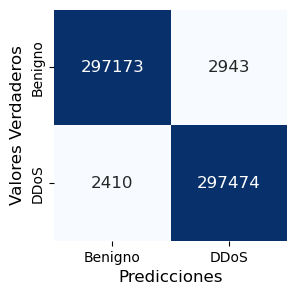

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'matriz_confusion' es tu matriz de confusión calculada previamente

# Definir los nombres de las clases
class_names = ["Benigno", "DDoS"]

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(3, 3))  # Ajustar el tamaño del gráfico
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})  # Ajustar el tamaño de la fuente

# Añadir etiquetas y título para mayor claridad
plt.xlabel('Predicciones', fontsize=12)  # Ajustar el tamaño de la fuente
plt.ylabel('Valores Verdaderos', fontsize=12)  # Ajustar el tamaño de la fuente
#plt.title('Matriz de Confusión', fontsize=12)  # Ajustar el tamaño de la fuente
plt.show()


In [20]:
# Evaluar el modelo en los conjuntos de datos
train_metrics = model.evaluate(X_train, y_train, verbose=0)
val_metrics = model.evaluate(X_val, y_val, verbose=0)
test_metrics = model.evaluate(X_test, y_test, verbose=0)

# Imprimir las métricas
metric_names = ['loss', 'accuracy', 'recall', 'precision', 'f1']
print("Metricas Datos Entrenamiento:")
for name, val in zip(metric_names, train_metrics):
    print(f"{name}: {val}")

print("\nMetricas Datos Validación:")
for name, val in zip(metric_names, val_metrics):
    print(f"{name}: {val}")

print("\nMetricas datos de prueba:")
for name, val in zip(metric_names, test_metrics):
    print(f"{name}: {val}")

Metricas Datos Entrenamiento:
loss: 0.04117997735738754
accuracy: 0.9900621175765991

Metricas Datos Validación:
loss: 0.04036826267838478
accuracy: 0.9903950095176697

Metricas datos de prueba:
loss: 0.042809486389160156
accuracy: 0.9896416664123535


##  LSTM +PCA

### LSTM

In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

In [48]:
# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape,X_test.shape)

(2800000, 22) (600000, 22)


In [49]:
model = keras.Sequential([
    # Primera capa LSTM con 24 neuronas, retornando secuencias para alimentar la siguiente capa LSTM
    layers.LSTM(24, return_sequences=True, input_shape=(X_train.shape[1], 1), dropout=0.1), 
    # Segunda capa LSTM con 12 neuronas, esta vez no retorna secuencias ya que es la última capa LSTM    
    layers.LSTM(12, dropout=0.1),
    # Capa de salida con 2 neuronas para la clasificación o predicción
    layers.Dense(1, activation='sigmoid')
])

# Configurar el optimizador Adam con momentum
momentum = 0.9  # se puede ajustar
opt = Adam(learning_rate=0.01, beta_1=momentum)

# Configurar el optimizador Adam
model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualizar el modelo en forma de gráfico y guardarlo en un archivo
plot_model(model, to_file='modelLSTM_PCA.png', show_shapes=True, show_layer_names=True)

# Resumen del modelo
model.summary()

# Definir el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

start_time = time.time()
# Entrenar modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=160, callbacks=[early_stopping])

# Calcular el tiempo transcurrido en minutos
end_time = time.time()
elapsed_time_minutes = (end_time - start_time) / 60
print("Tiempo de entrenamiento (minutos):", elapsed_time_minutes)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 22, 24)            2496      
                                                                 
 lstm_7 (LSTM)               (None, 12)                1776      
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 4,285
Trainable params: 4,285
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
17500/17500 [==============================] - 148s 8ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0145 - val_accuracy: 0.9954
Epoch 2/15
17500/17500 [==============================] - 142s 8ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.0118 - val_accuracy: 0.9966
Epoch 3/15
17500/175

### Metricas

In [50]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Realiza predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convierte las probabilidades en clases predichas (usando un umbral de 0.5)

# Calcula la precisión, el recall y el F1-score para la clasificación binaria
precision = precision_score(y_test, y_pred_classes, average='binary')
recall = recall_score(y_test, y_pred_classes, average='binary')
f1 = f1_score(y_test, y_pred_classes, average='binary')
accuracy = accuracy_score(y_test, y_pred_classes)

print("Exactitud:", accuracy)
print("Sensibilidad:", recall)
print("Precisión:", precision)
print("F1-score:", f1)

18750/18750 [==============================] - 59s 3ms/step
Exactitud: 0.9966683333333334
Sensibilidad: 0.9958583985807846
Precisión: 0.9974716014415546
F1-score: 0.9966643472282711


### Guardar modelo keras

In [51]:
model.save('lstm_PCA.keras')

In [52]:
import pickle
# Guardar el historial de entrenamiento en un archivo(diccionario)
with open('historylt_PCA.pkl', 'wb') as file:
    pickle.dump(history.history, file, protocol=pickle.HIGHEST_PROTOCOL) 

##### cargar

In [ ]:
from keras.models import load_model
# Cargar el modelo desde un archivo en formato nativo de Keras
model = load_model('lstm_PCA.keras')

In [ ]:
import pickle
# Cargar el historial de entrenamiento desde un archivo
with open('historylt__PCA.pkl', 'rb') as file:
   history = pickle.load(file)

### AUC

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular el AUC
auc = roc_auc_score(y_test, y_pred)

El Area bajo la curva(AUC) es: 0.9988895577950877


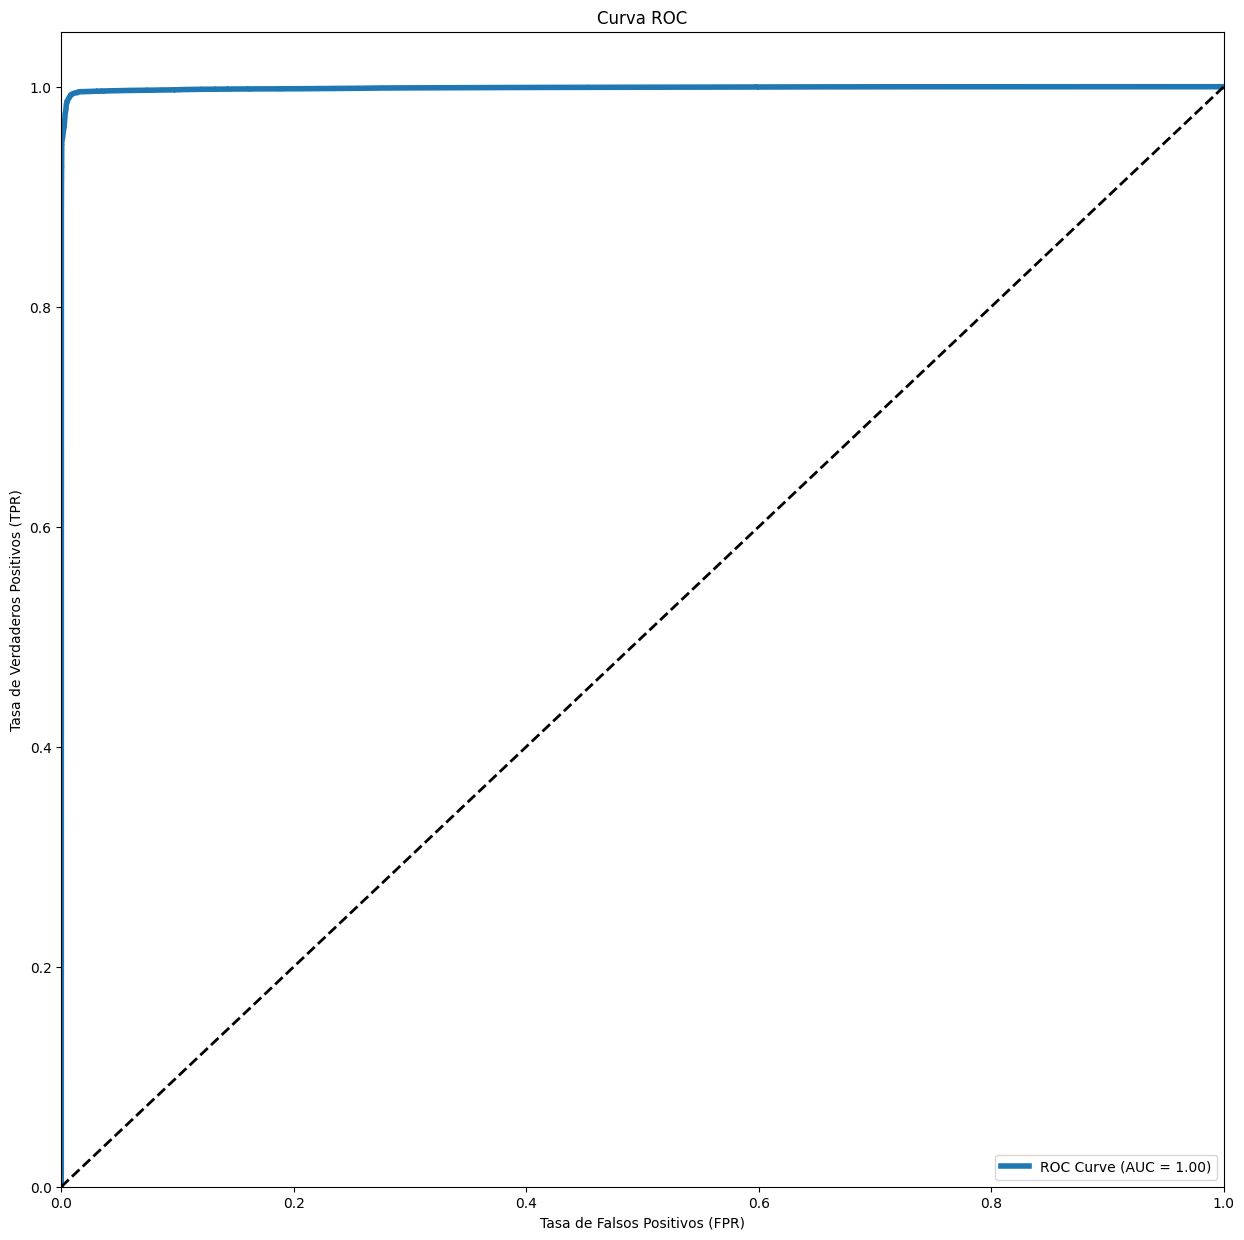

In [55]:
# Gráfica de la curva ROC
plt.figure(figsize=(15, 15))
plt.plot(fpr, tpr, linewidth=4, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")

#auc_crv = auc(fpr, tpr)
print(f"El Area bajo la curva(AUC) es: {auc}")
# Mostrar la gráfica de la curva ROC
plt.show()


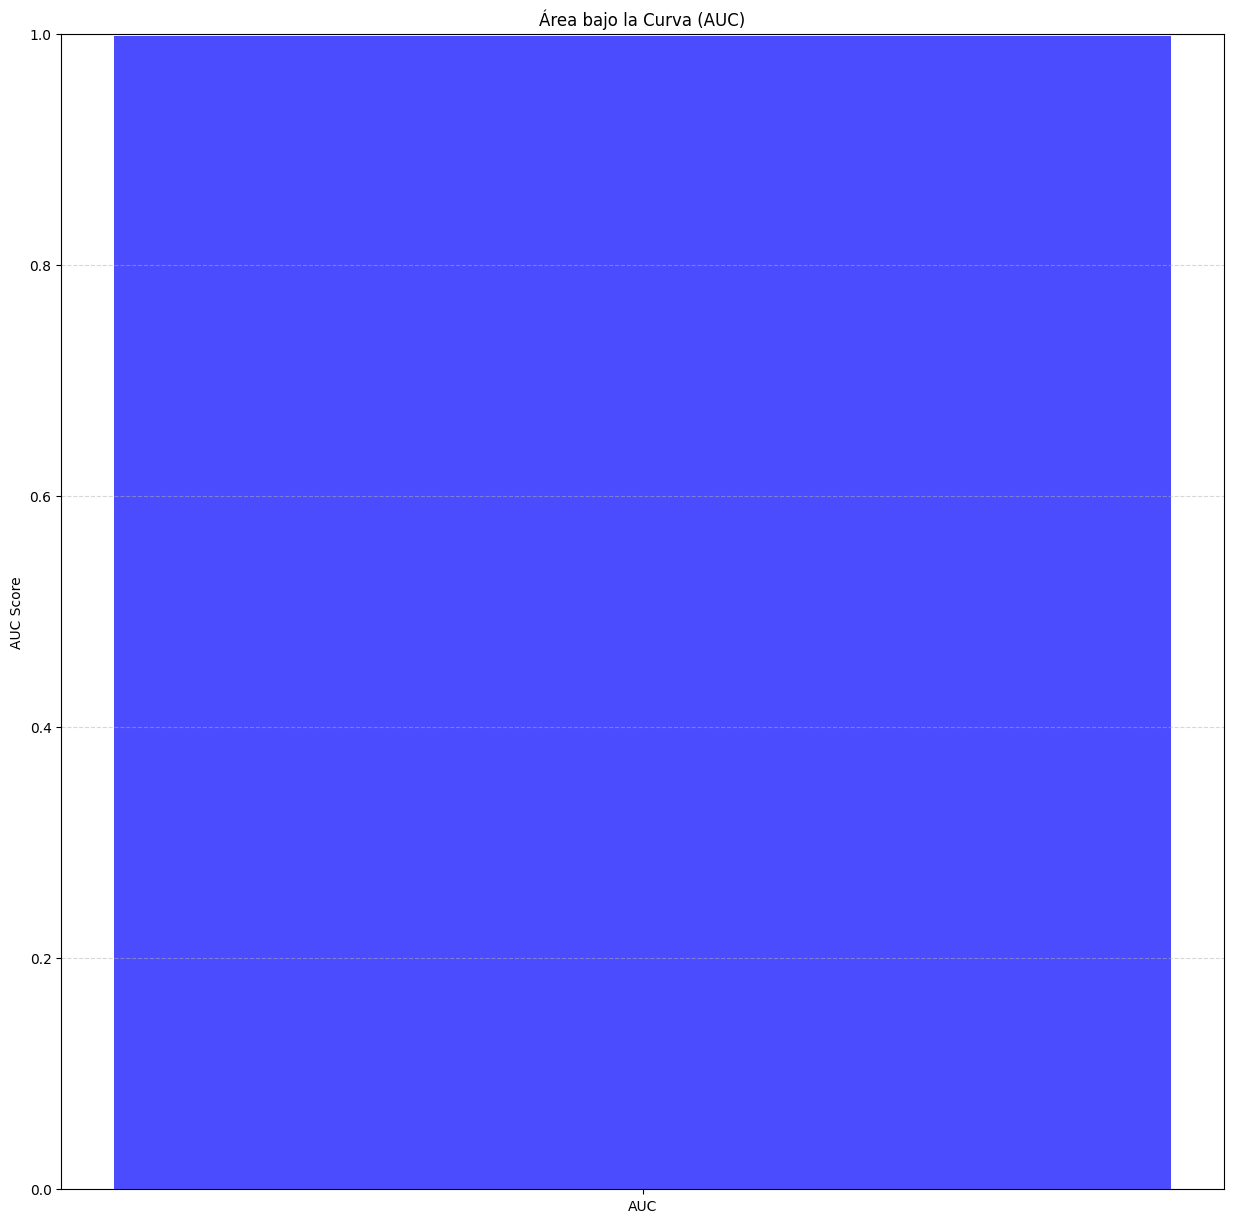

In [56]:
# Gráfica del AUC
plt.figure(figsize=(15,15))
plt.bar(['AUC'], [auc], color='b', alpha=0.7)
plt.ylim([0.0, 1.0])
plt.ylabel('AUC Score')
plt.title('Área bajo la Curva (AUC)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar la gráfica del AUC
plt.show()

In [10]:
# Evaluar el modelo en los conjuntos de datos
train_metrics = model.evaluate(X_train, y_train, verbose=0)
val_metrics = model.evaluate(X_val, y_val, verbose=0)
test_metrics = model.evaluate(X_test, y_test, verbose=0)

# Imprimir las métricas
metric_names = ['loss', 'accuracy', 'recall', 'precision', 'f1']
print("Metricas Datos Entrenamiento:")
for name, val in zip(metric_names, train_metrics):
    print(f"{name}: {val}")

print("\nMetricas Datos Validación:")
for name, val in zip(metric_names, val_metrics):
    print(f"{name}: {val}")

print("\nMetricas datos de prueba:")
for name, val in zip(metric_names, test_metrics):
    print(f"{name}: {val}")

Metricas Datos Entrenamiento:
loss: 0.025654051452875137
accuracy: 0.9927607178688049

Metricas Datos Validación:
loss: 0.025333866477012634
accuracy: 0.9928550124168396

Metricas datos de prueba:
loss: 0.026603659614920616
accuracy: 0.9923516511917114


### Graficar Curvas Aprendizaje Modelo en memoria (no cargado)

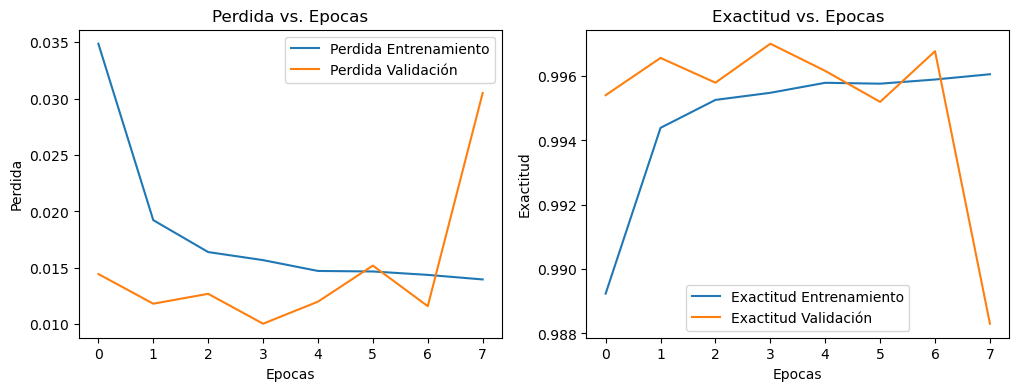

In [53]:
# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida Validación')
plt.title('Perdida vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitud Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud Validación')
plt.title('Exactitud vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.legend()

plt.show()

### Cargar diccionario de historia con pickle y graficar curvas de aprendizaje

In [ ]:

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Perdida Entrenamiento')
plt.plot(history['val_loss'], label='Perdida Validación')
plt.title('Perdida vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Exactitud Entrenamiento')
plt.plot(history['val_accuracy'], label='Exactitud Validación')
plt.title('Exactitud vs. Epocas')
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.legend()

plt.show()

### Matriz

In [54]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Hacer predicciones
predicciones = model.predict(X_test)  # X_val es el conjunto de validación/prueba

# En un problema de clasificación binaria, normalmente se redondea la probabilidad a 0 o 1
# Esto es asumiendo que el modelo produce una salida de probabilidad para la clase positiva
predicciones_etiquetas = (predicciones > 0.5).astype(int)

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones_etiquetas)

# Imprimir la matriz de confusión
print(matriz_confusion)

18750/18750 [==============================] - 65s 3ms/step
[[299359    757]
 [  1242 298642]]


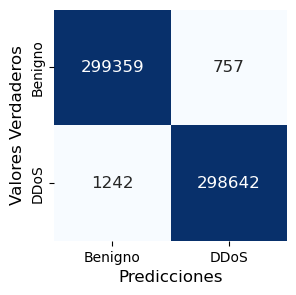

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'matriz_confusion' es tu matriz de confusión calculada previamente

# Definir los nombres de las clases
class_names = ["Benigno", "DDoS"]

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(3, 3))  # Ajustar el tamaño del gráfico
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})  # Ajustar el tamaño de la fuente

# Añadir etiquetas y título para mayor claridad
plt.xlabel('Predicciones', fontsize=12)  # Ajustar el tamaño de la fuente
plt.ylabel('Valores Verdaderos', fontsize=12)  # Ajustar el tamaño de la fuente
#plt.title('Matriz de Confusión', fontsize=12)  # Ajustar el tamaño de la fuente
plt.show()